<a href="https://colab.research.google.com/github/ChungSungyeon/SWproject_5/blob/main/1_Hello_PyTorch%2C_Hello_CNN!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Drive를 Colab VM에 Mount 합니다.
# '로그인 하겠습니까?' 묻는 창이 나오면 허가 해 주세요.
from google.colab import drive
drive.mount('/content/drive')

# 과제 파일을 다운 받은 경로를 입력해야 합니다.
# Google Drive의 폴더 경로는 /content/drive/My Drive/ 부터 시작합니다.
# 즉, 만약 당신이 구글 드라이브 최상단에 있는 'D2D' 폴더에 해당 파일을 다운 받았다고 합시다.
# 그러면 D2D 안에는 'Assignment 0' Colab 파일과, datasets 폴더가 있을 것입니다.
# 그렇다면 밑의 경로에는 '/D2D' 라고 적어주면 됩니다. 마지막에 '/'가 없음에 유의해 주세요.
FOLDERNAME = None
assert FOLDERNAME is not None, "[!] Enter the foldername."

# 이제 Drive를 마운트 했음을 확인했습니다.
# Python interpreter가 Colab VM이 python files를 load 할 수 있는지 확인합니다.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# 이 코드는 CIFAR-10 dataset이 Drive에 있는지 확인하고, 없으면 저장합니다.
%cd /content/drive/My\ Drive/$FOLDERNAME/datasets/
!bash get_datasets.sh
%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive


AssertionError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
FOLDERNAME = '/content/drive/MyDrive/D2D 과제/pytorch_cnn/1-hello-pytorch-hello-cnn-ChungSungyeon/D2D'

import sys
sys.path.append(FOLDERNAME)

In [ ]:
%cd /content/drive/MyDrive/D2D 과제/pytorch_cnn/1-hello-pytorch-hello-cnn-ChungSungyeon/D2D/datasets
!bash get_datasets.sh
%cd /content/drive/MyDrive/D2D 과제/pytorch_cnn/1-hello-pytorch-hello-cnn-ChungSungyeon/D2D

/content/drive/MyDrive/D2D 과제/pytorch_cnn/1-hello-pytorch-hello-cnn-ChungSungyeon/D2D/datasets
/content/drive/MyDrive/D2D 과제/pytorch_cnn/1-hello-pytorch-hello-cnn-ChungSungyeon/D2D


# PyTorch 시작하기
**AIKU 학회원 여러분!** 딥러닝을 향한 여정에 발 들인 것을 환영합니다😄.

학회원 여러분이 앞으로 마주하게 될 여러 어려움들이 있을텐데, Deep Into Deep의 수업과 과제가 그 길에 조금은 도움이 되길 바랍니다.

본 과제는 CS231n, 고려대학교 딥러닝 수업 등 여러 좋은 과제들을 혼합해 만들어 졌음을 미리 알립니다. 거인의 어깨를 만들어준 여러분 감사합니다!

다시 한 번 만나서 반갑습니다! **Happy Hacking!**

## 왜 Deep Learning frameworks를 써야할까요?

* 우리의 Code를 GPU로 실행 시킬 수 있습니다! 이를 통해 모델을 훨씬 빠르게 훈련할 수 있습니다. PyTorch나 TensorFlow와 같은 프레임워크를 사용하면 CUDA 코드를 직접 작성할 필요 없이(이 강의의 범위를 벗어나는) 자신만의 맞춤형 신경망 아키텍처를 위해 GPU의 성능을 활용할 수 있습니다.

* 이 강의에서는 프로젝트에 이러한 프레임워크 중 하나 (PyTorch)를 사용하여 사용하려는 모든 기능을 직접 작성할 때보다 더 효율적으로 실험할 수 있도록 준비할 것입니다.

* 거인들의 어깨 위에 서 보시기 바랍니다! TensorFlow와 PyTorch는 모두 여러분의 삶을 훨씬 편하게 만들어줄 훌륭한 프레임워크이며, 이제 그 기능을 이해하셨으니 자유롭게 사용하셔도 됩니다 :)

* 마지막으로, 학계나 업계에서 접할 수 있는 딥 러닝 코드에 노출되기를 바랍니다.

## PyTorch란 무엇일까요?
numpy의 ndarray와 비슷하게 동작하는 **Tensor objects**에 대해서 동적 computational graphs를 실행하는 시스템입니다. PyTorch는 사람이 직접 backpropagation을 계산할 필요가 없이 강력한 **자동 미분** 엔진을 제공합니다.

## 어떻게 PyTorch를 배울 수 있을까요?
이 과제만으로는 PyTorch 전반을 이해하는데 어려움이 있을 수 있습니다.

여러 가지 방법이 추천되지만, 도움이 될 만한 사이트와 학습 방법을 알려드리겠습니다.

PyTorch 공식 한국어 튜토리얼 :
https://tutorials.pytorch.kr/beginner/basics/intro.html

Stanford의 PyTorch 강의 : https://github.com/jcjohnson/pytorch-examples


# 목차
이 과제는 6개의 파트로 구성되어 있습니다. 파이토치를 더 잘 이해하고 최종 프로젝트를 준비하는 데 도움이 되는 **세 가지 추상화 수준**에서 파이토치를 배우게 됩니다.

이에 더해, 수업 시간에 배웠던 **AlexNet**을 재구현해 보면서 PyTorch에서 CNN Layer를 어떻게 사용할 수 있을지 배우게 됩니다.

1. Part I, 준비: CIFAR-10 데이터 세트를 사용합니다.
2. Part II, Barebones PyTorch: **추상화 수준 1**의 가장 낮은 수준의 PyTorch 텐서로 직접 작업합니다.
3. Part III, PyTorch Module API: **추상화 수준 2**에서는 `nn.Module`을 사용하여 임의의 신경망 아키텍처를 정의합니다.
4. Part IV, PyTorch Sequential API: **추상화 수준 3**에서는 `nn.Sequential`을 사용하여 Linear Feed-Forward Network를 매우 편리하게 정의합니다. + **AlexNet**을 재구현해 봅시다!
5. Part V, CIFAR-10 open-ended challenge: CIFAR-10에서 가능한 한 높은 정확도를 얻기 위해 자신만의 네트워크를 구현하세요. Layer, Optimizer, hyperparameters 또는 기타 고급 기능으로 실험해 볼 수 있습니다.
6. Additional Part, Pretrained model 불러오기: torchvision에서 다양한 pretrained model을 불러보고 finetuning 해 봅시다.

다음은 비교 표입니다:

| API | 유연성 | 편의성 |
|---------------|-------------|-------------|
| Barebones | 높음 | 낮음 |
| `nn.Module` | 높음 | 중간 |
| `nn.Sequential` | 낮음 | 높음 |

# GPU
`런타임 -> 런타임 유형 변경`을 클릭하고 `하드웨어 가속기` 아래에서 `GPU`를 선택하면 Colab에서 GPU 장치로 수동 전환할 수 있습니다. 런타임을 전환하면 커널이 다시 시작되므로 패키지를 가져오기 위해 다음 셀을 실행하기 전에 이 작업을 수행해야 합니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import numpy as np
from matplotlib import pyplot as plt

USE_GPU = True
dtype = torch.float32 # We will be using float throughout this tutorial.

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss.
print_every = 100
print('using device:', device)

using device: cuda


`using device: cuda`가 나오면 성공입니다!

## What is 'CUDA'?


> CUDA("Compute Unified Device Architecture", 쿠다)는 그래픽 처리 장치(GPU)에서 수행하는 (병렬 처리) 알고리즘을 C 프로그래밍 언어를 비롯한 산업 표준 언어를 사용하여 작성할 수 있도록 하는 GPGPU 기술이다. -Wikipedia-

GPU는 원래 그 이름에서도 알 수 있듯이 Graphic 연산을 위한 장치였습니다. 하지만 GPU가 병렬 처리를 매우 빠른 속도로 처리한다는 점에 주목하여, 일반적인 matrix 연산에 사용될 수 있는 GPGPU 기술이 제시되었습니다. NVIDA가 지원하는 CUDA를 통해 개발자들이 쉽게 GPU 상에서 병렬 처리 알고리즘을 실행할 수 있게 도와줍니다.

지금 과제는 Colab에서 진행되므로 특별히 CUDA Version을 설정해 줄 필요가 없습니다. 그렇지만, 앞으로 Local, 또는 Server에서 Deep Learning 코드를 실행하다 보면 CUDA, PyTorch 버젼과 관련된 오류를 많이 마주할 것입니다. 그럴 땐 다음과 같은 기술을 검토해 보세요.
* Anaconda



# Part I. 준비
이제 CIFAR-10 데이터 세트를 로드해 보겠습니다. 처음 몇 분 정도 걸릴 수 있지만 그 이후에는 파일이 캐시된 상태로 유지됩니다.

In [ ]:
NUM_TRAIN = 49000

# The torchvision.transforms package provides tools for preprocessing data
# and for performing data augmentation; here we set up a transform to
# preprocess the data by subtracting the mean RGB value and dividing by the
# standard deviation of each RGB value; we've hardcoded the mean and std.
transform = T.Compose([
                T.ToTensor(),
                T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])

# We set up a Dataset object for each split (train / val / test); Datasets load
# training examples one at a time, so we wrap each Dataset in a DataLoader which
# iterates through the Dataset and forms minibatches. We divide the CIFAR-10
# training set into train and val sets by passing a Sampler object to the
# DataLoader telling how it should sample from the underlying Dataset.
cifar10_train = dset.CIFAR10('./datasets', train=True, download=True,
                             transform=transform)
loader_train = DataLoader(cifar10_train, batch_size=64,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

cifar10_val = dset.CIFAR10('./datasets', train=True, download=True,
                           transform=transform)
loader_val = DataLoader(cifar10_val, batch_size=64,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))

cifar10_test = dset.CIFAR10('./datasets', train=False, download=True,
                            transform=transform)
loader_test = DataLoader(cifar10_test, batch_size=64)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


# Part II. Barebones PyTorch
PyTorch는 모델 아키텍처를 편리하게 정의하는 데 도움이 되는 하이레벨 API와 함께 제공되며, 이 튜토리얼의 Part II에서는 이를 다룰 것입니다. 이 섹션에서는 autograd engine을 더 잘 이해하기 위해 Barebones PyTorch 요소부터 시작하겠습니다. 이 연습을 마치면 하이레벨 모델 API를 더 잘 이해하게 될 것입니다.

두 개의 숨겨진 레이어가 있고 CIFAR 분류를 위한 bias가 없는 간단한 Fully-connected ReLU 네트워크로 시작하겠습니다. 이 구현은 PyTorch 텐서에서 연산을 사용하여 forward pass를 계산하고 PyTorch autograd를 사용하여 gradient를 계산합니다. 이 예제 이후에 더 어려운 버전을 작성할 것이므로 모든 줄을 이해하는 것이 중요합니다.

`requires_grad = True`로 PyTorch 텐서를 생성하면 해당 텐서를 포함하는 연산은 값만 계산하는 것이 아니라 백그라운드에서 계산 그래프를 구축하여 그래프를 통해 쉽게 역전파하여 다운스트림 손실에 대한 일부 텐서의 기울기를 계산할 수 있게 해줍니다. 구체적으로 x가 `x.requires_grad == True`인 텐서인 경우, 역전파 후 `x.grad`는 마지막에 scalar loss에 대한 x의 기울기를 보유하는 또 다른 텐서가 될 것입니다.

### PyTorch Tensors: Flatten 함수
PyTorch Tensors는 개념적으로 n차원 배열과 유사합니다. n차원 숫자 그리드이며, PyTorch는 n차원 배열과 마찬가지로 텐서에서 효율적으로 작동할 수 있는 많은 함수를 제공합니다. 간단한 예로, 아래에서는 완전히 연결된 신경망에서 사용할 수 있도록 이미지 데이터를 재구성하는 `flatten` 함수를 제공합니다.

이미지 데이터는 일반적으로 N x C x H x W 형태의 텐서에 저장된다는 점을 기억하세요:

* N은 데이터 포인트의 수입니다.
* C는 채널 수입니다.
* H는 중간 특징 맵의 픽셀 단위 높이입니다.
* W는 중간 피처 맵의 높이(픽셀)입니다.

이는 2D convolution 같이 중간 특징이 서로 상대적인 위치에 대한 공간적 이해가 필요한 작업을 수행할 때 데이터를 표현하는 데 적합한 방법입니다. 그러나 fully connected affine layers를 사용하여 이미지를 처리할 때는 각 데이터 포인트를 단일 벡터로 표현해야 하므로 데이터의 여러 채널, 행, 열을 분리하는 것은 더 이상 유용하지 않습니다. 따라서 'flatten' 연산을 사용하여 표현당 `C x H x W` 값을 하나의 긴 벡터로 축소합니다. 아래의 flatten 함수는 먼저 주어진 데이터 배치에서 N, C, H, W 값을 읽은 다음 해당 데이터의 'view'를 반환합니다. "view"는 numpy의 "reshape" 메서드와 유사합니다. x의 차원을 N x ?? 로 재형성하며, 여기서 ?? 는 무엇이든 허용됩니다(이 경우 C x H x W가 되지만 명시적으로 지정할 필요는 없습니다).

In [ ]:
def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

def test_flatten():
    x = torch.arange(12).view(2, 1, 3, 2)
    print('Before flattening: ', x)
    print('After flattening: ', flatten(x))

test_flatten()

Before flattening:  tensor([[[[ 0,  1],
          [ 2,  3],
          [ 4,  5]]],


        [[[ 6,  7],
          [ 8,  9],
          [10, 11]]]])
After flattening:  tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])


### Barebones PyTorch: Two-Layer Network

여기에서는 이미지 데이터 배치에 대해 완전히 연결된 2계층 ReLU 네트워크의 포워드 패스를 수행하는 함수 `two_layer_fc`를 정의합니다. 포워드 패스를 정의한 후에는 네트워크를 통해 0을 실행하여 충돌이 발생하지 않는지, 올바른 모양의 출력을 생성하는지 확인합니다.

여기서 코드를 작성할 필요는 없지만 구현을 읽고 이해하는 것이 중요합니다.

In [ ]:
import torch.nn.functional as F  # useful stateless functions

def two_layer_fc(x, params):
    """
    A fully-connected neural networks; the architecture is:
    NN is fully connected -> ReLU -> fully connected layer.
    Note that this function only defines the forward pass;
    PyTorch will take care of the backward pass for us.

    The input to the network will be a minibatch of data, of shape
    (N, d1, ..., dM) where d1 * ... * dM = D. The hidden layer will have H units,
    and the output layer will produce scores for C classes.

    Inputs:
    - x: A PyTorch Tensor of shape (N, d1, ..., dM) giving a minibatch of
      input data.
    - params: A list [w1, w2] of PyTorch Tensors giving weights for the network;
      w1 has shape (D, H) and w2 has shape (H, C).

    Returns:
    - scores: A PyTorch Tensor of shape (N, C) giving classification scores for
      the input data x.
    """
    # first we flatten the image
    x = flatten(x)  # shape: [batch_size, C x H x W]

    w1, w2 = params

    # Forward pass: compute predicted y using operations on Tensors. Since w1 and
    # w2 have requires_grad=True, operations involving these Tensors will cause
    # PyTorch to build a computational graph, allowing automatic computation of
    # gradients. Since we are no longer implementing the backward pass by hand we
    # don't need to keep references to intermediate values.
    # you can also use `.clamp(min=0)`, equivalent to F.relu()
    x = F.relu(x.mm(w1))
    x = x.mm(w2)
    return x


def two_layer_fc_test():
    hidden_layer_size = 42
    x = torch.zeros((64, 50), dtype=dtype)  # minibatch size 64, feature dimension 50
    w1 = torch.zeros((50, hidden_layer_size), dtype=dtype)
    w2 = torch.zeros((hidden_layer_size, 10), dtype=dtype)
    scores = two_layer_fc(x, [w1, w2])
    print(scores.size())  # you should see [64, 10]

two_layer_fc_test()

torch.Size([64, 10])


### Barebones PyTorch: Three-Layer ConvNet

여기서는 3계층 Convolution 네트워크의 순방향 패스를 수행하는 `three_layer_convnet` 함수의 구현을 완료합니다. 위와 같이 네트워크에 0을 전달하여 구현을 즉시 테스트할 수 있습니다. 네트워크는 다음과 같은 구조를 가져야 합니다:

1. `channel_1` 필터가 있는 Convolution 레이어(bias 포함), 각각 모양이 `KW1 x KH1`이고 zero padding 이 2입니다.
2. ReLU nonlinearity
3. `channel_2` 필터가 있는 Convolution 레이어(bias 포함), 각 필터의 모양이 `KW2 x KH2`이고 제로 패딩이 1입니다.
4. ReLU nonlinearity
5. bias가 있는 Fully-connected layer, C 클래스에 대한 점수를 생성합니다.

Fully-connected layer 이후에는 **소프트맥스 활성화가 없음**에 유의하십시오: 이는 PyTorch의 교차 엔트로피 손실이 소프트맥스 활성화를 수행하기 때문이며, 이 단계를 번들로 묶으면 계산이 더 효율적이기 때문입니다.

**힌트**: Convolutions에 대해: http://pytorch.org/docs/stable/nn.html#torch.nn.functional.conv2d; convolutional filters 모양에 주의해 주세요!

# TODO 1 : Three-Layer Convolution Network 함수 구현 (forward pass)

In [ ]:
def three_layer_convnet(x, params):
    """
    Performs the forward pass of a three-layer convolutional network with the
    architecture defined above.

    Inputs:
    - x: A PyTorch Tensor of shape (N, 3, H, W) giving a minibatch of images
    - params: A list of PyTorch Tensors giving the weights and biases for the
      network; should contain the following:
      - conv_w1: PyTorch Tensor of shape (channel_1, 3, KH1, KW1) giving weights
        for the first convolutional layer
      - conv_b1: PyTorch Tensor of shape (channel_1,) giving biases for the first
        convolutional layer
      - conv_w2: PyTorch Tensor of shape (channel_2, channel_1, KH2, KW2) giving
        weights for the second convolutional layer
      - conv_b2: PyTorch Tensor of shape (channel_2,) giving biases for the second
        convolutional layer
      - fc_w: PyTorch Tensor giving weights for the fully-connected layer. Can you
        figure out what the shape should be?
      - fc_b: PyTorch Tensor giving biases for the fully-connected layer. Can you
        figure out what the shape should be?

    Returns:
    - scores: PyTorch Tensor of shape (N, C) giving classification scores for x
    """
    conv_w1, conv_b1, conv_w2, conv_b2, fc_w, fc_b = params
    scores = None
    ################################################################################
    # TODO: Implement the forward pass for the three-layer ConvNet.                #
    ################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    # 첫번째 Convolution Layer (channel 1 필터, bias, zero-padding=2) + ReLU
    out_conv1 = F.conv2d(x, conv_w1, padding=2) + conv_b1.view(1, -1, 1, 1)
    out_relu1 = F.relu(out_conv1)

    # 두번째 Convolution Layer (channel 2 필터, bias, zero-padding=1) + ReLU
    out_conv2 = F.conv2d(out_relu1, conv_w2, padding=1) + conv_b2.view(1, -1, 1, 1)
    out_relu2 = F.relu(out_conv2)

    # Flattening (두번째 conv layer에서 fully connected layer로)
    N, _, H, W = out_relu2.shape
    out_relu2_flattened = out_relu2.view(N, -1)

    # Fully-connected layer
    scores = torch.matmul(out_relu2_flattened, fc_w) + fc_b

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    return scores

위에서 ConvNet의 포워드 패스를 정의한 후 다음 셀을 실행하여 구현을 테스트합니다.

이 함수를 실행하면 점수는 (64, 10) 모양을 가져야 합니다.

In [ ]:
def three_layer_convnet_test():
    x = torch.zeros((64, 3, 32, 32), dtype=dtype)  # minibatch size 64, image size [3, 32, 32]

    conv_w1 = torch.zeros((6, 3, 5, 5), dtype=dtype)  # [out_channel, in_channel, kernel_H, kernel_W]
    conv_b1 = torch.zeros((6,))  # out_channel
    conv_w2 = torch.zeros((9, 6, 3, 3), dtype=dtype)  # [out_channel, in_channel, kernel_H, kernel_W]
    conv_b2 = torch.zeros((9,))  # out_channel

    # you must calculate the shape of the tensor after two conv layers, before the fully-connected layer
    fc_w = torch.zeros((9 * 32 * 32, 10))
    fc_b = torch.zeros(10)

    scores = three_layer_convnet(x, [conv_w1, conv_b1, conv_w2, conv_b2, fc_w, fc_b])
    print(scores.size())  # you should see [64, 10]
three_layer_convnet_test()

torch.Size([64, 10])


### Barebones PyTorch: Initialization
모델의 가중치 행렬을 초기화하는 몇 가지 유틸리티 메서드를 작성해 보겠습니다.

- `random_weight(shape)`는 Kaiming normalization 방법으로 가중치 텐서를 초기화합니다.
- `zero_weight(shape)`는 모든 0으로 가중치 텐서를 초기화합니다. 바이어스 매개변수를 인스턴스화할 때 유용합니다.

`random_weight` 함수는 Kaiming normal initialization 방법을 사용합니다:

He et al, *Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification*, ICCV 2015, https://arxiv.org/abs/1502.01852

In [ ]:
def random_weight(shape):
    """
    Create random Tensors for weights; setting requires_grad=True means that we
    want to compute gradients for these Tensors during the backward pass.
    We use Kaiming normalization: sqrt(2 / fan_in)
    """
    if len(shape) == 2:  # FC weight
        fan_in = shape[0]
    else:
        fan_in = np.prod(shape[1:]) # conv weight [out_channel, in_channel, kH, kW]
    # randn is standard normal distribution generator.
    w = torch.randn(shape, device=device, dtype=dtype) * np.sqrt(2. / fan_in)
    w.requires_grad = True
    return w

def zero_weight(shape):
    return torch.zeros(shape, device=device, dtype=dtype, requires_grad=True)

# create a weight of shape [3 x 5]
# you should see the type `torch.cuda.FloatTensor` if you use GPU.
# Otherwise it should be `torch.FloatTensor`
random_weight((3, 5))

tensor([[-1.4446, -1.9986,  0.1978, -0.7797,  1.8778],
        [ 0.0218,  1.2169,  0.2591,  0.1601,  0.9159],
        [-0.1943,  0.4244, -1.1435, -2.0878, -0.4045]], device='cuda:0',
       requires_grad=True)

### Barebones PyTorch: Check Accuracy
모델을 훈련할 때 다음 함수를 사용하여 훈련 또는 검증 세트에서 모델의 정확도를 확인합니다.

정확도를 확인할 때 기울기를 계산할 필요가 없으므로 점수를 계산할 때 PyTorch가 계산 그래프를 만들 필요가 없습니다. 그래프가 생성되는 것을 방지하기 위해 `torch.no_grad()` context manager에서 계산 범위를 지정합니다.

In [ ]:
def check_accuracy_part2(loader, model_fn, params):
    """
    Check the accuracy of a classification model.

    Inputs:
    - loader: A DataLoader for the data split we want to check
    - model_fn: A function that performs the forward pass of the model,
      with the signature scores = model_fn(x, params)
    - params: List of PyTorch Tensors giving parameters of the model

    Returns: Nothing, but prints the accuracy of the model
    """
    split = 'val' if loader.dataset.train else 'test'
    print('Checking accuracy on the %s set' % split)
    num_correct, num_samples = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.int64)
            scores = model_fn(x, params)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f%%)' % (num_correct, num_samples, 100 * acc))

### BareBones PyTorch: Training Loop
이제 네트워크를 훈련하기 위한 basic training loop를 설정할 수 있습니다. momentum 없이 Stochastic gradient descent를 사용하여 모델을 훈련할 것입니다. 여기서는 `torch.functional.cross_entropy`를 사용하여 loss를 계산할 것입니다(http://pytorch.org/docs/stable/nn.html#cross-entropy).

training loop는 신경망 함수, 초기화된 매개변수 목록(예제에서는 `[w1, w2]`), 학습 속도를 입력으로 받습니다.

In [ ]:
def train_part2(model_fn, params, learning_rate):
    """
    Train a model on CIFAR-10.

    Inputs:
    - model_fn: A Python function that performs the forward pass of the model.
      It should have the signature scores = model_fn(x, params) where x is a
      PyTorch Tensor of image data, params is a list of PyTorch Tensors giving
      model weights, and scores is a PyTorch Tensor of shape (N, C) giving
      scores for the elements in x.
    - params: List of PyTorch Tensors giving weights for the model
    - learning_rate: Python scalar giving the learning rate to use for SGD

    Returns: Nothing
    """
    for t, (x, y) in enumerate(loader_train):
        # Move the data to the proper device (GPU or CPU)
        x = x.to(device=device, dtype=dtype)
        y = y.to(device=device, dtype=torch.long)

        # Forward pass: compute scores and loss
        scores = model_fn(x, params)
        loss = F.cross_entropy(scores, y)

        # Backward pass: PyTorch figures out which Tensors in the computational
        # graph has requires_grad=True and uses backpropagation to compute the
        # gradient of the loss with respect to these Tensors, and stores the
        # gradients in the .grad attribute of each Tensor.
        loss.backward()

        # Update parameters. We don't want to backpropagate through the
        # parameter updates, so we scope the updates under a torch.no_grad()
        # context manager to prevent a computational graph from being built.
        with torch.no_grad():
            for w in params:
                w -= learning_rate * w.grad

                # Manually zero the gradients after running the backward pass
                w.grad.zero_()

        if t % print_every == 0:
            print('Iteration %d, loss = %.4f' % (t, loss.item()))
            check_accuracy_part2(loader_val, model_fn, params)
            print()

### BareBones PyTorch: Train a Two-Layer Network
이제 training loop를 실행할 준비가 되었습니다. fully connected weights인 `w1`과 `w2`에 대한 Tensor를 명시적으로 할당해야 합니다.

CIFAR의 각 minibatch에는 64개의 예가 있으므로 텐서 모양은 `[64, 3, 32, 32]`입니다.

flatten 후 `x` 모양은 `[64, 3 * 32 * 32]`가 되어야 합니다. 이것이 `w1`의 첫 번째 차원 크기가 됩니다.
`w1`의 두 번째 차원은 hidden layer size이며, 이는 또한 `w2`의 첫 번째 차원이 됩니다.

마지막으로 네트워크의 출력은 10개의 클래스에 대한 확률 분포를 나타내는 10차원 벡터입니다.

hyperparameter를 조정할 필요는 없지만 한 회기 동안 훈련한 후에는 40% 이상의 정확도를 볼 수 있습니다.

In [ ]:
hidden_layer_size = 4000
learning_rate = 1e-2

w1 = random_weight((3 * 32 * 32, hidden_layer_size))
w2 = random_weight((hidden_layer_size, 10))

train_part2(two_layer_fc, [w1, w2], learning_rate)

Iteration 0, loss = 3.1841
Checking accuracy on the val set
Got 143 / 1000 correct (14.30%)

Iteration 100, loss = 3.2715
Checking accuracy on the val set
Got 295 / 1000 correct (29.50%)

Iteration 200, loss = 2.1854
Checking accuracy on the val set
Got 335 / 1000 correct (33.50%)

Iteration 300, loss = 2.3084
Checking accuracy on the val set
Got 388 / 1000 correct (38.80%)

Iteration 400, loss = 2.3396
Checking accuracy on the val set
Got 370 / 1000 correct (37.00%)

Iteration 500, loss = 1.9307
Checking accuracy on the val set
Got 425 / 1000 correct (42.50%)

Iteration 600, loss = 1.6215
Checking accuracy on the val set
Got 435 / 1000 correct (43.50%)

Iteration 700, loss = 1.6348
Checking accuracy on the val set
Got 407 / 1000 correct (40.70%)



### BareBones PyTorch: Training a ConvNet

아래에서는 위에서 정의한 함수를 사용하여 CIFAR에서 3계층 Convolutional network를 훈련해야 합니다. 네트워크의 아키텍처는 다음과 같아야 합니다:

1. 32개의 5x5 필터가 있는 컨볼루션 레이어(바이어스 포함), 제로 패딩은 2입니다.
2. ReLU
3. 16개의 3x3 필터가 있는 컨볼루션 레이어(바이어스 포함), 제로 패딩 1
4. ReLU
5. 10개의 클래스에 대한 점수를 계산하기 위한 완전 연결 레이어(바이어스 포함)

위에서 정의한 `random_weight` 함수를 사용하여 가중치 행렬을 초기화해야 하며, 위의 `zero_weight` 함수를 사용하여 바이어스 벡터를 초기화해야 합니다.

하이퍼파라미터를 조정할 필요는 없지만 모든 것이 올바르게 작동하면 한 에포크 후에 42% 이상의 정확도를 달성해야 합니다.

# TODO 2 : Three-Layer Convolutional Network 가중치, 바이어스 초기화

In [ ]:
learning_rate = 3e-3

channel_1 = 32
channel_2 = 16

conv_w1 = None
conv_b1 = None
conv_w2 = None
conv_b2 = None
fc_w = None
fc_b = None

################################################################################
# TODO: Initialize the parameters of a three-layer ConvNet.                    #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
'''
    Inputs:
    - x: A PyTorch Tensor of shape (N, 3, H, W) giving a minibatch of images
    - params: A list of PyTorch Tensors giving the weights and biases for the
      network; should contain the following:
      - conv_w1: PyTorch Tensor of shape (channel_1, 3, KH1, KW1) giving weights
        for the first convolutional layer
      - conv_b1: PyTorch Tensor of shape (channel_1,) giving biases for the first
        convolutional layer
      - conv_w2: PyTorch Tensor of shape (channel_2, channel_1, KH2, KW2) giving
        weights for the second convolutional layer
      - conv_b2: PyTorch Tensor of shape (channel_2,) giving biases for the second
        convolutional layer
      - fc_w: PyTorch Tensor giving weights for the fully-connected layer. Can you
        figure out what the shape should be?
      - fc_b: PyTorch Tensor giving biases for the fully-connected layer. Can you
        figure out what the shape should be?
'''

def three_layer_convnet(x, params):

    conv_w1, conv_b1, conv_w2, conv_b2, fc_w, fc_b = params
    scores = None

    # 첫번째 Convolution Layer (5x5 필터 32개, bias, zero-padding=2) + ReLU
    out_conv1 = F.conv2d(x, conv_w1, padding=2) + conv_b1.view(1, -1, 1, 1)
    out_relu1 = F.relu(out_conv1)

    # 두번째 Convolution Layer (3x3 필터 16개, bias, zero-padding=1) + ReLU
    out_conv2 = F.conv2d(out_relu1, conv_w2, padding=1) + conv_b2.view(1, -1, 1, 1)
    out_relu2 = F.relu(out_conv2)

    # Flattening (두번째 conv layer에서 fully connected layer로)
    N, _, H, W = out_relu2.shape
    out_relu2_flattened = out_relu2.view(N, -1)

    # Fully-connected layer
    scores = torch.matmul(out_relu2_flattened, fc_w) + fc_b

    return scores


def init_three_layer_convnet():
    conv_w1 = random_weight((channel_1, 3, 5, 5))
    conv_b1 = zero_weight(channel_1)
    conv_w2 = random_weight((channel_2, channel_1, 3, 3))
    conv_b2 = zero_weight(channel_2)
    fc_w = random_weight((channel_2 * 32 * 32, 10))
    fc_b = zero_weight(10)
    return [conv_w1, conv_b1, conv_w2, conv_b2, fc_w, fc_b]

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

params = init_three_layer_convnet()
train_part2(three_layer_convnet, params, learning_rate)

Iteration 0, loss = 3.4065
Checking accuracy on the val set
Got 124 / 1000 correct (12.40%)

Iteration 100, loss = 1.6991
Checking accuracy on the val set
Got 358 / 1000 correct (35.80%)

Iteration 200, loss = 1.8920
Checking accuracy on the val set
Got 424 / 1000 correct (42.40%)

Iteration 300, loss = 1.7903
Checking accuracy on the val set
Got 422 / 1000 correct (42.20%)

Iteration 400, loss = 1.4961
Checking accuracy on the val set
Got 443 / 1000 correct (44.30%)

Iteration 500, loss = 1.6724
Checking accuracy on the val set
Got 456 / 1000 correct (45.60%)

Iteration 600, loss = 1.5625
Checking accuracy on the val set
Got 450 / 1000 correct (45.00%)

Iteration 700, loss = 1.3900
Checking accuracy on the val set
Got 467 / 1000 correct (46.70%)



# Part III. PyTorch Module API

Barebone PyTorch에서는 모든 Parameter tensors를 수작업으로 추적해야 합니다. 이는 몇 개의 텐서가 있는 소규모 네트워크에서는 괜찮지만, 대규모 네트워크에서 수십 또는 수백 개의 텐서를 추적하는 것은 매우 불편하고 오류가 발생하기 쉽습니다.

PyTorch는 임의의 네트워크 아키텍처를 정의하는 동시에 학습 가능한 모든 파라미터를 추적할 수 있도록 `nn.Module` API를 제공합니다. Part II에서는 SGD를 직접 구현해 보았습니다. PyTorch는 또한 RMSProp, Adagrad, Adam과 같은 모든 일반적인 Optimizer를 구현하는 `torch.optim` 패키지를 제공합니다. 심지어 L-BFGS와 같은 대략적인 2차 방법도 지원합니다! 각 옵티마이저의 정확한 사양은 [문서](http://pytorch.org/docs/master/optim.html)를 참고하세요.

모듈 API를 사용하려면 아래 단계를 따르세요:

1. 서브클래스 `nn.Module`. 네트워크 클래스에 `TwoLayerFC`와 같은 직관적인 이름을 지정합니다.

2. 생성자 `__init__()`에서 필요한 모든 레이어를 클래스 속성으로 정의합니다. `nn.Linear` 및 `nn.Conv2d`와 같은 레이어 객체는 그 자체로 `nn.Module` 서브클래스이며 학습 가능한 파라미터를 포함하므로 원시 텐서를 직접 인스턴스화할 필요가 없습니다. `nn.Module`이 이러한 내부 파라미터를 추적합니다. 수십 개의 내장 레이어에 대해 자세히 알아보려면 [문서](http://pytorch.org/docs/master/nn.html)를 참조하세요. **경고**: `super().__init__()`를 먼저 호출하는 것을 잊지 마세요!

3. `forward()` 메서드에서 네트워크의 *연결성*을 정의합니다. 텐서를 입력으로 받고 "변환된" 텐서를 출력하는 함수 호출로 `__init__`에 정의된 속성을 사용해야 합니다. `forward()`에서 학습 가능한 매개변수가 있는 새 레이어를 생성하지 마세요! 모든 매개변수는 `__init__`에서 미리 선언해야 합니다.

모듈 서브클래스를 정의한 후에는 객체로 인스턴스화하여 Part II의 NN 전달 함수처럼 호출할 수 있습니다.

### Module API: Two-Layer Network
다음은 fully connected 2계층 네트워크의 구체적인 예입니다:

In [ ]:
class TwoLayerFC(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        # assign layer objects to class attributes
        self.fc1 = nn.Linear(input_size, hidden_size)
        # nn.init package contains convenient initialization methods
        # http://pytorch.org/docs/master/nn.html#torch-nn-init
        nn.init.kaiming_normal_(self.fc1.weight)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        nn.init.kaiming_normal_(self.fc2.weight)

    def forward(self, x):
        # forward always defines connectivity
        x = flatten(x)
        scores = self.fc2(F.relu(self.fc1(x)))
        return scores

def test_TwoLayerFC():
    input_size = 50
    x = torch.zeros((64, input_size), dtype=dtype)  # minibatch size 64, feature dimension 50
    model = TwoLayerFC(input_size, 42, 10)
    scores = model(x)
    print(scores.size())  # you should see [64, 10]
test_TwoLayerFC()

torch.Size([64, 10])


### Module API: Three-Layer ConvNet
이제 완전히 연결된 레이어에 이어 3계층 ConvNet을 구현할 차례입니다. 네트워크 아키텍처는 파트 II와 동일해야 합니다:

1. zero-padding이 2인 `channel_1` 5x5 필터가 있는 컨볼루션 레이어
2. ReLU
3. `channel_2` 3x3 필터가 있는 Convolution Layer, zero-padding 1
4. ReLU
5. `num_classes` 클래스에 완전히 연결된 레이어

Kaiming normal initialize 방법을 사용하여 모델의 가중치 행렬을 초기화해야 합니다.

**HINT**: http://pytorch.org/docs/stable/nn.html#conv2d

3계층 ConvNet을 구현한 후 `test_ThreeLayerConvNet` 함수가 구현을 실행하면 출력 점수의 모양에 대해 `(64, 10)`이 출력되어야 합니다.

# TODO 3 : ConvNet init
# TODO 4 : ConvNet forward

In [ ]:
class ThreeLayerConvNet(nn.Module):
    def __init__(self, in_channel, channel_1, channel_2, num_classes):
        super().__init__()
        ########################################################################
        # TODO: Set up the layers you need for a three-layer ConvNet with the  #
        # architecture defined above.                                          #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # convolutional layer 1
        self.conv1 = nn.Conv2d(in_channel, channel_1, kernel_size=5, padding=2)
        nn.init.kaiming_normal_(self.conv1.weight)
        self.conv1.bias.data.fill_(0)

        # convolutional layer 2
        self.conv2 = nn.Conv2d(channel_1, channel_2, kernel_size=3, padding=1)
        nn.init.kaiming_normal_(self.conv2.weight)
        self.conv2.bias.data.fill_(0)

        # Fully connected layer
        self.fc = nn.Linear(channel_2 * 32 * 32, num_classes)
        nn.init.kaiming_normal_(self.fc.weight)
        self.fc.bias.data.fill_(0)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                          END OF YOUR CODE                            #
        ########################################################################

    def forward(self, x):
        scores = None
        ########################################################################
        # TODO: Implement the forward function for a 3-layer ConvNet. you      #
        # should use the layers you defined in __init__ and specify the        #
        # connectivity of those layers in forward()                            #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # convolutional layer 1
        out_conv1 = F.relu(self.conv1(x))

        # convolutional layer 2
        out_conv2 = F.relu(self.conv2(out_conv1))

        # Flattening
        N, _, H, W = out_conv2.shape
        out_conv2_flattened = out_conv2.view(N, -1)

        # Fully connected layer
        scores = self.fc(out_conv2_flattened)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################
        return scores


def test_ThreeLayerConvNet():
    x = torch.zeros((64, 3, 32, 32), dtype=dtype)  # minibatch size 64, image size [3, 32, 32]
    model = ThreeLayerConvNet(in_channel=3, channel_1=12, channel_2=8, num_classes=10)
    scores = model(x)
    print(scores.size())  # you should see [64, 10]
test_ThreeLayerConvNet()

torch.Size([64, 10])


### Module API: Check Accuracy
검증 또는 테스트 세트가 주어지면 신경망의 분류 정확도를 확인할 수 있습니다.

이 버전은 Part II의 버전과 약간 다릅니다. 더 이상 매개 변수를 수동으로 전달하지 않습니다.

In [ ]:
def check_accuracy_part34(loader, model):
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

### Module API: Training Loop
또한 약간 다른 training loop를 사용합니다. 가중치 값을 직접 업데이트하는 대신, Optimization 알고리즘의 개념을 추상화하고 신경망 최적화에 일반적으로 사용되는 대부분의 알고리즘 구현을 제공하는 `torch.optim` 패키지의 Optimizer 객체를 사용합니다.

In [ ]:
def train_part34(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.

    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for

    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy_part34(loader_val, model)
                print()

### Module API: Train a Two-Layer Network
이제 training loop를 실행할 준비가 되었습니다. Part II와 달리 이번에는 Parameter tensors를 더 이상 명시적으로 할당하지 않습니다.

입력 크기, 숨겨진 레이어 크기, 클래스 수(즉, 출력 크기)를 `TwoLayerFC`의 생성자에 전달하기만 하면 됩니다.

또한 `TwoLayerFC` 내에서 학습 가능한 모든 파라미터를 추적하는 옵티마이저를 정의해야 합니다.

하이퍼파라미터를 조정할 필요는 없지만, 한 epoch 동안 학습한 후 40% 이상의 모델 정확도를 볼 수 있어야 합니다.

In [ ]:
hidden_layer_size = 4000
learning_rate = 1e-2
model = TwoLayerFC(3 * 32 * 32, hidden_layer_size, 10)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_part34(model, optimizer)

Iteration 0, loss = 3.2445
Checking accuracy on validation set
Got 141 / 1000 correct (14.10)

Iteration 100, loss = 2.4783
Checking accuracy on validation set
Got 345 / 1000 correct (34.50)

Iteration 200, loss = 2.0190
Checking accuracy on validation set
Got 341 / 1000 correct (34.10)

Iteration 300, loss = 2.2167
Checking accuracy on validation set
Got 355 / 1000 correct (35.50)

Iteration 400, loss = 1.5565
Checking accuracy on validation set
Got 403 / 1000 correct (40.30)

Iteration 500, loss = 1.9652
Checking accuracy on validation set
Got 398 / 1000 correct (39.80)

Iteration 600, loss = 1.5724
Checking accuracy on validation set
Got 393 / 1000 correct (39.30)

Iteration 700, loss = 2.0485
Checking accuracy on validation set
Got 408 / 1000 correct (40.80)



### Module API: Train a Three-Layer ConvNet
이제 Module API를 사용하여 CIFAR에서 3계층 ConvNet을 훈련해야 합니다. 이는 2계층 네트워크 훈련과 매우 유사하게 보일 것입니다! 하이퍼파라미터를 조정할 필요는 없지만, 한 회기 동안 훈련한 후 45% 이상을 달성해야 합니다.

Momentum이 없는 Stochastic gradient descent를 사용하여 모델을 훈련해야 합니다.

# TODO 5  : Module API로 train

In [ ]:
learning_rate = 3e-3
channel_1 = 32
channel_2 = 16

model = None
optimizer = None
################################################################################
# TODO: Instantiate your ThreeLayerConvNet model and a corresponding optimizer #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# 모델 인스턴스화..?
model = ThreeLayerConvNet(in_channel=3, channel_1=channel_1, channel_2=channel_2, num_classes=10)

# 옵티마이저 인스턴스화
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

train_part34(model, optimizer)

Iteration 0, loss = 3.2272
Checking accuracy on validation set
Got 165 / 1000 correct (16.50)

Iteration 100, loss = 1.9060
Checking accuracy on validation set
Got 359 / 1000 correct (35.90)

Iteration 200, loss = 1.8074
Checking accuracy on validation set
Got 400 / 1000 correct (40.00)

Iteration 300, loss = 1.8056
Checking accuracy on validation set
Got 423 / 1000 correct (42.30)

Iteration 400, loss = 1.6122
Checking accuracy on validation set
Got 455 / 1000 correct (45.50)

Iteration 500, loss = 1.5138
Checking accuracy on validation set
Got 450 / 1000 correct (45.00)

Iteration 600, loss = 1.5356
Checking accuracy on validation set
Got 483 / 1000 correct (48.30)

Iteration 700, loss = 1.2224
Checking accuracy on validation set
Got 483 / 1000 correct (48.30)



# Part IV. PyTorch Sequential API

Part III에서는 임의의 학습 가능한 레이어와 그 연결성을 정의할 수 있는 PyTorch 모듈 API를 소개했습니다.

Feed forward layers과 같은 간단한 모델의 경우, `nn.Module` 서브클래스를 생성하고, `__init__`에서 클래스 속성에 레이어를 할당하고, `forward()`에서 각 레이어를 하나씩 호출하는 3단계를 거쳐야 합니다. 더 편리한 방법이 있을까요?

다행히도 PyTorch에서는 위의 단계를 하나로 합친 `nn.Sequential`이라는 컨테이너 모듈을 제공합니다. feed forward stacks보다 더 복잡한 topology를 지정할 수 없기 때문에 `nn.Module`만큼 유연하지는 않지만, 많은 사용 사례에 충분합니다.

### Sequential API: 2계층 네트워크
`nn.Sequential`을 사용하여 2계층 fully connected 네트워크 예제를 다시 작성하고 위에서 정의한 training loop를 사용하여 트레이닝하는 방법을 살펴봅시다.

여기서도 하이퍼파라미터를 조정할 필요는 없지만, 한 번의 훈련 후에는 40% 이상의 정확도를 달성해야 합니다.

In [ ]:
# We need to wrap `flatten` function in a module in order to stack it
# in nn.Sequential
class Flatten(nn.Module):
    def forward(self, x):
        return flatten(x)

hidden_layer_size = 4000
learning_rate = 1e-2

model = nn.Sequential(
    Flatten(),
    nn.Linear(3 * 32 * 32, hidden_layer_size),
    nn.ReLU(),
    nn.Linear(hidden_layer_size, 10),
)

# you can use Nesterov momentum in optim.SGD
optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                     momentum=0.9, nesterov=True)

train_part34(model, optimizer)

Iteration 0, loss = 2.3501
Checking accuracy on validation set
Got 146 / 1000 correct (14.60)

Iteration 100, loss = 1.9374
Checking accuracy on validation set
Got 402 / 1000 correct (40.20)

Iteration 200, loss = 2.0495
Checking accuracy on validation set
Got 393 / 1000 correct (39.30)

Iteration 300, loss = 1.6523
Checking accuracy on validation set
Got 428 / 1000 correct (42.80)

Iteration 400, loss = 1.6194
Checking accuracy on validation set
Got 449 / 1000 correct (44.90)

Iteration 500, loss = 1.4614
Checking accuracy on validation set
Got 453 / 1000 correct (45.30)

Iteration 600, loss = 1.6641
Checking accuracy on validation set
Got 427 / 1000 correct (42.70)

Iteration 700, loss = 1.5714
Checking accuracy on validation set
Got 445 / 1000 correct (44.50)



### Sequential API: Three-Layer ConvNet
여기서는 `nn.Sequential`을 사용하여 Part III에서 사용한 것과 동일한 아키텍처로 3계층 ConvNet을 정의하고 훈련해야 합니다:

1. 32개의 5x5 필터가 있는 Convolution 레이어(바이어스 포함), zero-padding은 2입니다.
2. ReLU
3. 16개의 3x3 필터가 있는 Convolution 레이어(바이어스 포함), zero-padding 1
4. ReLU
5. 10개의 클래스에 대한 점수를 계산하기 위한  fully-connected layer(바이어스 포함)

기본 PyTorch 가중치 초기화를 사용할 수 있습니다.

Nesterov momentum 0.9의 확률적 경사 하강을 사용하여 모델을 최적화해야 합니다.

다시 말하지만, 하이퍼파라미터를 조정할 필요는 없지만 한 번의 훈련 후에는 55% 이상의 정확도를 볼 수 있어야 합니다.

# TODO 6 : Sequential API

In [ ]:
channel_1 = 32
channel_2 = 16
learning_rate = 1e-2

model = None
optimizer = None

################################################################################
# TODO: Rewrite the 2-layer ConvNet with bias from Part III with the           #
# Sequential API.                                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# 모델 정의
model = nn.Sequential(
    nn.Conv2d(3, channel_1, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.Conv2d(channel_1, channel_2, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(channel_2 * 32 * 32, 10)
)

# Initialize (사실 잘 모르겠어서 베껴옴,, .kaiming은 정확도가 너무 낮아서 .xavier 사용)
for layer in model.children():
    if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear):
        nn.init.xavier_normal_(layer.weight)

# 옵티마이저 정의
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

train_part34(model, optimizer)

Iteration 0, loss = 2.3706
Checking accuracy on validation set
Got 102 / 1000 correct (10.20)

Iteration 100, loss = 1.5339
Checking accuracy on validation set
Got 432 / 1000 correct (43.20)

Iteration 200, loss = 1.4598
Checking accuracy on validation set
Got 485 / 1000 correct (48.50)

Iteration 300, loss = 1.4566
Checking accuracy on validation set
Got 487 / 1000 correct (48.70)

Iteration 400, loss = 1.4490
Checking accuracy on validation set
Got 519 / 1000 correct (51.90)

Iteration 500, loss = 1.4644
Checking accuracy on validation set
Got 542 / 1000 correct (54.20)

Iteration 600, loss = 1.5940
Checking accuracy on validation set
Got 551 / 1000 correct (55.10)

Iteration 700, loss = 1.2295
Checking accuracy on validation set
Got 570 / 1000 correct (57.00)



# Let's do this! - Reimplement AlexNet
이제 PyTorch의 기본적인 사용법을 모두 배워 봤습니다. 지금까지 배웠던 내용을 바탕으로 Deep Into Deep 수업 중에 다루었던 모델 중 하나인 [AlexNet](https://papers.nips.cc/paper_files/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html)을 재구현해 보도록 하겠습니다.


## AlexNet Architecture
AlexNet의 전체적인 구조는 다음과 같습니다.

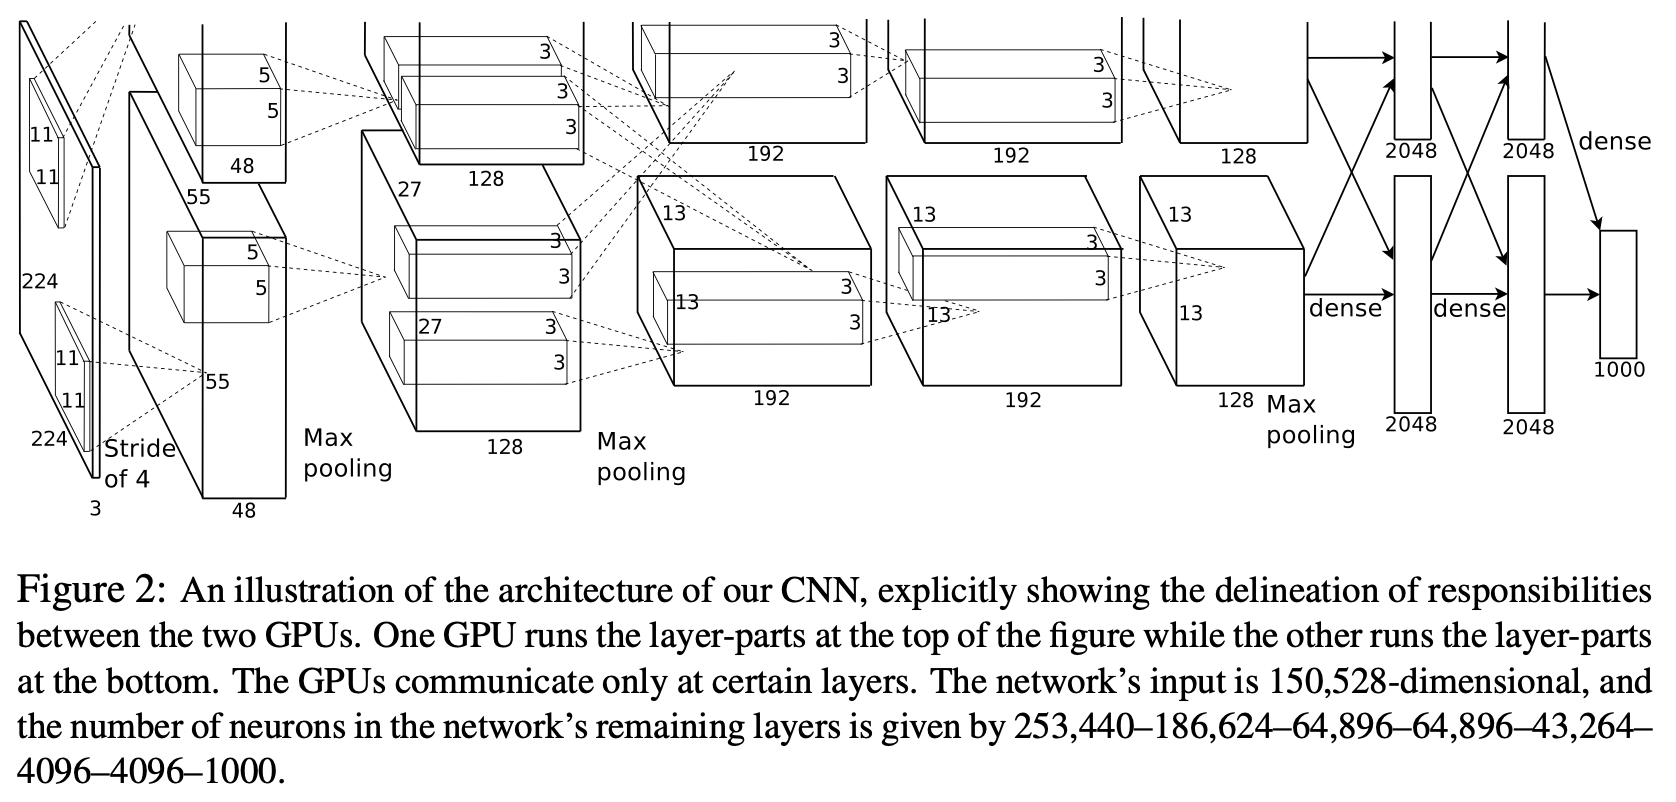

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

images = './notebook_images/AlexNet_Architecture.png'
image = cv2.imread(images)
cv2_imshow(image)

## 구현 세부사항
이 그림을 바탕으로 AlexNet을 재구현 해 봅시다. 그러기 위해서 몇 가지 알고 넘어가야할 부분이 있습니다.

AlexNet의 Input Data는 원래 3x227x227입니다. 하지만 우리는 지금 3x32x32인 CIFAR-10 Dataset에 대해서 실험을 하고 있습니다. 그렇기 때문에 Input Data의 dimension을 맞춰주는 작업이 필요합니다.

PyTorch에는 이를 위한 Upsample 클래스가 존재합니다.

```
nn.Upsample(size=(227,227))
```

> **주의** : 이는 실험의 편의성을 위해 사용한 방식입니다. 실제로 논문을 재구현 할 때에는 실험이 진행된 Data와 동일한 dimension의 Data를 사용하여야 합니다.

+ 추가로, Deep Learning 분야에서 많이 화제가 되었던 이야기 중 하나가 Input dimension이 맞지 않는다는 것이었습니다. 논문에서 첫번째 Convolution Layer에서 filter size가 11이고, stride가 4라는 것만 언급 되어 있습니다. 그 때 output volume을 계산해 보면 정수가 아닙니다. 많은 주장이 있었지만 저자가 Padding 3를 빼먹었다고 생각해, 본 구현에서도 Padding 3을 줬습니다.


 **추가 7.13 수정** : 이미지 원래 사이즈가 3x227x227이고, Padding은 없는게 맞는 것 같습니다. ((227 - 11) / 4 + 1 = 55) **알려주셔서 감사합니다!**

또한, AlexNet은 GPU 두 개에서 모델을 돌리기 위해 구성되었습니다. 2012년 AlexNet이 구현될 때와 달리 지금은 GPU 성능이 많이 발전하여, 하나의 GPU에서도 충분히 이를 실행시킬 수 있습니다. 하나의 GPU에서 실행되도록 모델을 수정해서 실험해 봅시다.

그림에서 볼 수 있듯이 윗쪽과 아래쪽 CNN Layer가 있습니다. 이 Layer들을 하나로 합한다면, feature 수가 늘어난다고 생각하면 됩니다. 예를 들어, 첫 번째 CNN Layer는 48개의 filter가 두 개 있는데, 이를 96개의 filter가 있다고 생각하면 됩니다.

Fully-Connected Layer 또한 2048 + 2048 = 4096개의 feature를 가진다고 생각하면 됩니다.

**재구현은 Module API를 사용해도 좋고, Sequential API를 사용해도 좋습니다. 권투를 빕니다!**




## AlexNet Architecture Summary
다음은 논문에 나온 AlexNet의 구조를 요약한 것입니다. 구현에 참고해 주세요.
### features
|Layer|# of filters|Filter Size|Stride|Padding|Size of feature map|Activation|
|:-----|:-----------|:----|:-----------|:------|:----------|:--|
|Input Image|-|-|-|-|3x32x32|-|
|Upsample|-|-|-|-|3x227x227|-|
|Convolution 1|96|11x11|4|-|55x55x96|ReLU|
|Max Pooling 1|-|3x3|2|-|27x27x96|-|
|Convolution 2|256|5x5|1|2|27x27x256|ReLU|
|Max Pooling 2|-|3x3|2|-|13x13x256|-|
|Convolution 3|384|3x3|1|1|13x13x384|ReLU|
|Convolution 4|384|3x3|1|1|13x13x384|ReLU|
|Convolution 5|256|3x3|1|1|13x13x256|ReLU|
|Max Pooling 3|-|3x3|2|-|6x6x256|-|

### classifier
|Layer|in_feature|out_feature|dropout rate|Activation|
|:----|:---------|:----------|:-----------|:---------|
|Flatten|-|-|-|-|
|Dropout 1|-|-|0.5|-|
|Fully-Connected 1|9216|4096|-|ReLU|
|Dropout 2|-|-|0.5|-|
|Fully-Connected 2|4096|4096|-|ReLU|
|Fully-Connected 3|4096|10|-|-|


In [ ]:
learning_rate = 1e-4

model = None
optimizer = None

################################################################################
# TODO: Reimplement AlexNet                                                    #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

model = nn.Sequential(
    nn.Upsample(size=(227,227)),  #upsample
    nn.Conv2d(3, 96, kernel_size=11, stride=4),  #Conv1
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  #MaxPool1
    nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),  #Conv2
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  #MaxPool2
    nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),  #Conv3
    nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),  #Conv4
    nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),  #Conv5
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  #MaxPool3,

    nn.Flatten(),  #Flatten
    nn.Dropout(p=0.5),  #Dropout1
    nn.Linear(9216, 4096),  #FC1
    nn.ReLU(),
    nn.Dropout(p=0.5),  #Dropout2
    nn.Linear(4096, 4096),  #FC2
    nn.ReLU(),
    nn.Linear(4096, 10)  #FC3
)

for layer in model.children():
    if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear):
        nn.init.xavier_normal_(layer.weight)

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

train_part34(model, optimizer, epochs=10)

Iteration 0, loss = 2.3112
Checking accuracy on validation set
Got 121 / 1000 correct (12.10)

Iteration 100, loss = 2.3093
Checking accuracy on validation set
Got 151 / 1000 correct (15.10)

Iteration 200, loss = 2.3120
Checking accuracy on validation set
Got 140 / 1000 correct (14.00)

Iteration 300, loss = 2.2856
Checking accuracy on validation set
Got 127 / 1000 correct (12.70)

Iteration 400, loss = 2.2740
Checking accuracy on validation set
Got 129 / 1000 correct (12.90)

Iteration 500, loss = 2.2721
Checking accuracy on validation set
Got 153 / 1000 correct (15.30)

Iteration 600, loss = 2.2561
Checking accuracy on validation set
Got 171 / 1000 correct (17.10)

Iteration 700, loss = 2.2487
Checking accuracy on validation set
Got 221 / 1000 correct (22.10)

Iteration 0, loss = 2.2114
Checking accuracy on validation set
Got 226 / 1000 correct (22.60)

Iteration 100, loss = 2.2391
Checking accuracy on validation set
Got 231 / 1000 correct (23.10)

Iteration 200, loss = 2.2212
Check

KeyboardInterrupt: ignored

In [ ]:
class AlexNet(nn.module):
  def __init__(self, num_classes=1000):
    super(AlexNet, self).__init__()
    self.features = nn.Sequential(
        nn.Upsample(size=(227,227)),  #upsample
        nn.Conv2d(3, 96, kernel_size=11, stride=4),  #Conv1
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),  #MaxPool1
        nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),  #Conv2
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),  #MaxPool2
        nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),  #Conv3
        nn.ReLU(),
        nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),  #Conv4
        nn.ReLU(),
        nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),  #Conv5
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),  #MaxPool3
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),  #Flatten
        nn.Dropout(p=0.5),  #Dropout1
        nn.Linear(9216, 4096),  #FC1
        nn.ReLU(),
        nn.Dropout(p=0.5),  #Dropout2
        nn.Linear(4096, 4096),  #FC2
        nn.ReLU(),
        nn.Linear(4096, 10)  #FC3
    )

  def forward(self, x):
    x = self.features(x)
    x = self.classifier(x)
    return x


## Describe what you did

재구현에 성공했나요? 실패했다면 어떤 점이 어려웠나요? 다른 모델과 비교했을 때 더 좋은 성능이 나왔나요? 혹은 ILSVRC'12와 비슷한 성능인가요? 만약 기대하던 성능이 안 나왔다면 어떤 문제가 있었을까요? 자유롭게 생각을 적어주세요.

**Answer:**

재구현의 성공 기준이 무엇인지 모르겠지만 error 비율이 15.4%인 당시 기록에 비해서는 부족하다. 하지만 위에서 구현한 모델 중에는 정확도가 55.9%로 가장 높았다.
ILSVRC는 최고의 성능을 보여주기 위해 데이터셋을 전처리하고, 하이퍼 파라미터 튜닝, 파인 튜닝 등 다양한 기법을 사용했을 것이기 때문에 조금 성능이 떨어질 수 있다.
또한, 데이터셋이 원래 32*32 사이즈였던 것을 upsampling한 것이기 때문에 대회의 input size에 맞춘 모델에서 성능이 다소 떨어질 수 있다.

# Part V. CIFAR-10 open-ended challenge

이 section에서는 CIFAR-10에서 원하는 ConvNet 아키텍처를 실험해 볼 수 있습니다.

이제 여러분이 할 일은 아키텍처, 하이퍼파라미터, loss 함수, Optimizer를 실험하여 10개 epoch 이내에 CIFAR-10 **Validation** 세트에서 **70% 이상** 정확도를 달성하는 모델을 훈련하는 것입니다. 위에서 확인_정확도 및 훈련 함수를 사용할 수 있습니다. `nn.Module` 또는 `nn.Sequential` API를 사용할 수 있습니다.

이 노트북의 마지막에 여러분이 수행한 작업을 설명하세요.

다음은 각 구성 요소에 대한 공식 API 문서입니다. 한 가지 참고 사항: "spatial batch norm" 클래스에서 호출하는 것을 PyTorch에서는 "BatchNorm2D"라고 부릅니다.

* Layers in torch.nn package: http://pytorch.org/docs/stable/nn.html
* Activations: http://pytorch.org/docs/stable/nn.html#non-linear-activations
* Loss functions: http://pytorch.org/docs/stable/nn.html#loss-functions
* Optimizers: http://pytorch.org/docs/stable/optim.html


### 시도해 볼만한 일:
- **Filter size**: 위에서는 5x5를 사용했는데, 더 작은 필터가 더 효율적일까요?
- **Filters 수**: 위에서는 32개의 필터를 사용했습니다. 필터 수가 많거나 적을수록 더 효율적일까요?
- **Pooling vs Strided Convolution**: max pooling을 사용하나요, 아니면 Strided Convolution만 사용하나요?
- **Batch normalization**: Convolutional Layer 뒤에 spatial batch normalization을, affine 레이어 뒤에 vanilla batch normalization을 추가해 보세요. 네트워크가 더 빠르게 훈련되나요?
- **네트워크 아키텍처**: 위의 네트워크에는 두 개의 학습 가능한 파라미터 레이어가 있습니다. 심층 네트워크를 사용하면 더 잘할 수 있나요? 시도해 볼 만한 좋은 아키텍처는 다음과 같습니다:
    - [conv-relu-pool]xN -> [affine]xM -> [softmax 또는 SVM]
    - [conv-relu-conv-relu-pool]xN -> [affine]xM -> [softmax 또는 SVM]
    - [batchnorm-relu-conv]xN -> [affine]xM -> [softmax 또는 SVM]
- **Global Average Pooling**: 평평하게 한 다음 여러 개의 Affine 레이어를 갖는 대신 이미지가 작아질 때까지 Convolution을 수행한 다음(7x7 정도) Average Pooling 연산을 수행하여 1x1 이미지 사진(1, 1 , Filter#)을 얻은 다음 (Filter#) 벡터로 재형성합니다. 이 방식은 [Google's Inception Network](https://arxiv.org/abs/1512.00567)에서 사용됩니다(아키텍처는 표 1 참조).
- **Regularization**: l2 가중치 regulariztion를 추가하거나 Dropout을 사용할 수 있습니다.

### Tips for training
시도하는 각 네트워크 아키텍처에 대해 학습 속도와 기타 하이퍼파라미터를 조정해야 합니다. 이 작업을 수행할 때 명심해야 할 몇 가지 중요한 사항이 있습니다:

- 매개변수가 잘 작동하는 경우 수백 번의 반복을 통해 개선 효과를 볼 수 있어야 합니다.
- 하이퍼파라미터 튜닝을 위한 거칠고 세밀한 접근 방식을 기억하세요. 몇 번의 학습 반복만으로 광범위한 하이퍼파라미터를 테스트하여 제대로 작동하는 파라미터 조합을 찾는 것부터 시작하세요.
- 효과가 있는 것으로 보이는 몇 가지 파라미터 세트를 찾으면 해당 파라미터를 중심으로 더 세밀하게 검색하세요. 더 많은 epoch에 대해 훈련해야 할 수도 있습니다.
- 하이퍼파라미터 검색에는 유효성 검사 집합을 사용하고, 유효성 검사 집합에서 선택한 최상의 파라미터로 아키텍처를 평가하기 위해 테스트 집합을 저장해야 합니다.

### Going above and beyond
모험심이 강하다면 성능을 향상시키기 위해 구현할 수 있는 다른 기능도 많이 있습니다. 이러한 기능을 반드시 구현해야 하는 것은 아니지만, 시간이 된다면 그 재미를 놓치지 마세요!

- 대체 optimizers: Adam, Adagrad, RMSprop 등을 사용해 볼 수 있습니다.
- Leaky ReLU, parametric ReLU, ELU 또는 MaxOut과 같은 대체 Activation 함수.
- Model ensembles
- Data augmentation
- 새로운 아키텍처
  - [ResNets](https://arxiv.org/abs/1512.03385) 이전 레이어의 입력이 출력에 추가됩니다.
  - [DenseNets](https://arxiv.org/abs/1608.06993) 이전 레이어에 대한 입력이 서로 연결되는 곳입니다.
  - [이 블로그에서 자세한 개요를 확인할 수 있습니다.](https://chatbotslife.com/resnets-highwaynets-and-densenets-oh-my-9bb15918ee32)

### Have fun and happy training!

In [ ]:
def train_part5(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.

    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for

    Returns: Nothing, but prints model accuracies during training.
    """
    avg_losses = []
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        avg_loss = 0.0
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy_part34(loader_val, model)
                print()

            avg_loss += loss.item()
        avg_losses.append(avg_loss / len(loader_train))
    return avg_losses

In [ ]:
# AlexNet (xavier, SGD nesterov)
model = nn.Sequential(
    nn.Upsample(size=(227,227)),  #upsample
    nn.Conv2d(3, 96, kernel_size=11, stride=4),  #Conv1
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  #MaxPool1
    nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),  #Conv2
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  #MaxPool2
    nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),  #Conv3
    nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),  #Conv4
    nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),  #Conv5
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  #MaxPool3,

    nn.Flatten(),  #Flatten
    nn.Dropout(p=0.5),  #Dropout1
    nn.Linear(9216, 4096),  #FC1
    nn.ReLU(),
    nn.Dropout(p=0.5),  #Dropout2
    nn.Linear(4096, 4096),  #FC2
    nn.ReLU(),
    nn.Linear(4096, 10)  #FC3
)

# Initialization
for layer in model.children():
    if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear):
        nn.init.xavier_normal_(layer.weight)

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)

In [ ]:
# He Initialization function
def he_initialization(layer):
    if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear):
        nn.init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')

model.apply(he_initialization)

In [ ]:
# Adam Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Vanilla Batch Normalization
class VanillaBatchNorm(nn.Module):
    def __init__(self, num_features):
        super(VanillaBatchNorm, self).__init__()
        self.bn = nn.BatchNorm1d(num_features, affine=True)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = self.bn(x)
        x = x.view(x.size(0), -1, 1, 1)  # Reshape back to the original shape
        return x

In [ ]:
# Batch normalization(spatial, vanilla)
model = nn.Sequential(
    nn.Upsample(size=(227, 227)),  # upsample
    nn.Conv2d(3, 96, kernel_size=11, stride=4),  # Conv1
    nn.BatchNorm2d(96),  # Spatial Batch Normalization after Conv1
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  # MaxPool1
    nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),  # Conv2
    nn.BatchNorm2d(256),  # Spatial Batch Normalization after Conv2
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  # MaxPool2
    nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),  # Conv3
    nn.BatchNorm2d(384),  # Spatial Batch Normalization after Conv3
    nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),  # Conv4
    nn.BatchNorm2d(384),  # Spatial Batch Normalization after Conv4
    nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),  # Conv5
    nn.BatchNorm2d(256),  # Spatial Batch Normalization after Conv5
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  # MaxPool3

    nn.Flatten(),  # Flatten
    nn.Dropout(p=0.5),  # Dropout1
    nn.Linear(9216, 4096),  # FC1
    VanillaBatchNorm(4096),  # Vanilla Batch Normalization after FC1
    nn.ReLU(),
    nn.Dropout(p=0.5),  # Dropout2
    nn.Linear(4096, 4096),  # FC2
    VanillaBatchNorm(4096),  # Vanilla Batch Normalization after FC2
    nn.ReLU(),
    nn.Linear(4096, 10)  # FC3
)

In [ ]:
# batch
model = nn.Sequential(
    nn.Upsample(size=(227, 227)),  # upsample
    nn.Conv2d(3, 96, kernel_size=11, stride=4),  # Conv1
    nn.BatchNorm2d(96),  # Spatial Batch Normalization after Conv1
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  # MaxPool1
    nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),  # Conv2
    nn.BatchNorm2d(256),  # Spatial Batch Normalization after Conv2
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  # MaxPool2
    nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),  # Conv3
    nn.BatchNorm2d(384),  # Spatial Batch Normalization after Conv3
    nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),  # Conv4
    nn.BatchNorm2d(384),  # Spatial Batch Normalization after Conv4
    nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),  # Conv5
    nn.BatchNorm2d(256),  # Spatial Batch Normalization after Conv5
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  # MaxPool3

    nn.Flatten(),  # Flatten
    nn.Dropout(p=0.5),  # Dropout1
    nn.Linear(256 * 6 * 6, 4096),  # FC1
    nn.BatchNorm1d(4096),  # Batch Normalization after FC1
    nn.ReLU(),
    nn.Dropout(p=0.5),  # Dropout2
    nn.Linear(4096, 4096),  # FC2
    nn.BatchNorm1d(4096),  # Batch Normalization after FC2
    nn.ReLU(),
    nn.Linear(4096, 10)  # FC3
)

Iteration 0, loss = 2.5579
Checking accuracy on validation set
Got 86 / 1000 correct (8.60)

Iteration 100, loss = 1.7422
Checking accuracy on validation set
Got 420 / 1000 correct (42.00)

Iteration 200, loss = 1.5979
Checking accuracy on validation set
Got 500 / 1000 correct (50.00)

Iteration 300, loss = 1.6760
Checking accuracy on validation set
Got 540 / 1000 correct (54.00)

Iteration 400, loss = 1.5350
Checking accuracy on validation set
Got 567 / 1000 correct (56.70)

Iteration 500, loss = 0.9879
Checking accuracy on validation set
Got 580 / 1000 correct (58.00)

Iteration 600, loss = 1.1209
Checking accuracy on validation set
Got 596 / 1000 correct (59.60)

Iteration 700, loss = 1.1311
Checking accuracy on validation set
Got 653 / 1000 correct (65.30)

Iteration 0, loss = 1.0375
Checking accuracy on validation set
Got 592 / 1000 correct (59.20)

Iteration 100, loss = 1.1317
Checking accuracy on validation set
Got 648 / 1000 correct (64.80)

Iteration 200, loss = 0.9787
Checkin

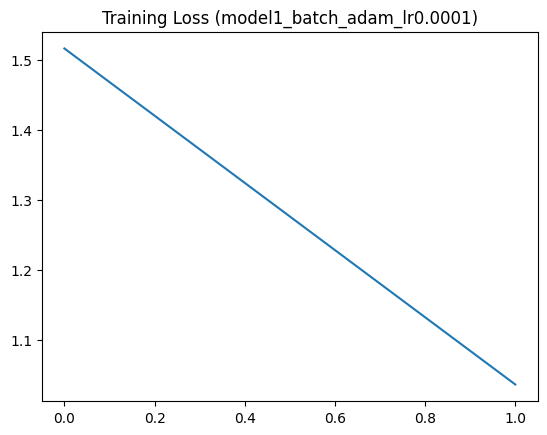

In [ ]:
################################################################################
# TODO:                                                                        #
# Experiment with any architectures, optimizers, and hyperparameters.          #
# Achieve AT LEAST 70% accuracy on the *validation set* within 10 epochs.      #
#                                                                              #
# Note that you can use the check_accuracy function to evaluate on either      #
# the test set or the validation set, by passing either loader_test or         #
# loader_val as the second argument to check_accuracy. You should not touch    #
# the test set until you have finished your architecture and  hyperparameter   #
# tuning, and only run the test set once at the end to report a final value.   #
################################################################################
model = None
optimizer = None
experiment_name = "model1_batch_adam_lr0.0001"
# Change the above experiment_name to store the avg_losses while perserving
# the previous avg_losses. Using the same value for experiment_name results in
# overwriting the previous one.

# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


# Hyperparameters
learning_rate = 1e-4

# AlexNet
model = nn.Sequential(
    nn.Upsample(size=(227, 227)),  # upsample
    nn.Conv2d(3, 96, kernel_size=11, stride=4),  # Conv1
    nn.BatchNorm2d(96),  # Spatial Batch Normalization after Conv1
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  # MaxPool1
    nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),  # Conv2
    nn.BatchNorm2d(256),  # Spatial Batch Normalization after Conv2
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  # MaxPool2
    nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),  # Conv3
    nn.BatchNorm2d(384),  # Spatial Batch Normalization after Conv3
    nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),  # Conv4
    nn.BatchNorm2d(384),  # Spatial Batch Normalization after Conv4
    nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),  # Conv5
    nn.BatchNorm2d(256),  # Spatial Batch Normalization after Conv5
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),  # MaxPool3

    nn.Flatten(),  # Flatten
    nn.Dropout(p=0.5),  # Dropout1
    nn.Linear(256 * 6 * 6, 4096),  # FC1
    nn.BatchNorm1d(4096),  # Batch Normalization after FC1
    nn.ReLU(),
    nn.Dropout(p=0.5),  # Dropout2
    nn.Linear(4096, 4096),  # FC2
    nn.BatchNorm1d(4096),  # Batch Normalization after FC2
    nn.ReLU(),
    nn.Linear(4096, 10)  # FC3
)

# Initialization
for layer in model.children():
    if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear):
        nn.init.xavier_normal_(layer.weight)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# You should get at least 70% accuracy
avg_losses = train_part5(model, optimizer, epochs=2)
avg_losses = np.array(avg_losses)
np.save("%s.npy" % experiment_name, avg_losses)

plt.plot(avg_losses)
plt.title("Training Loss (%s)" % experiment_name)
plt.show()

이전에 실행한 `experiment_name` 여러 개를 리스트 내에 나열해 보세요. 각 실험의 손실 함수 추이를 비교할 수 있습니다.

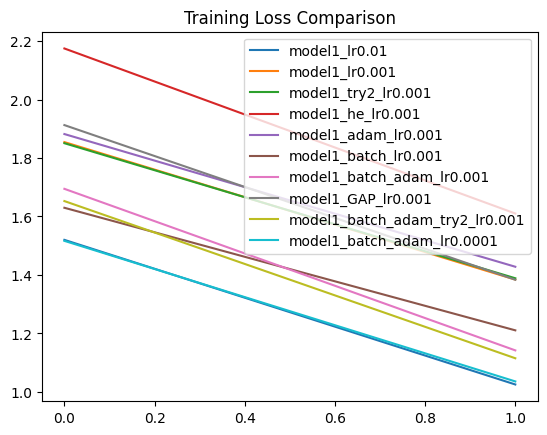

In [ ]:
experiment_names = [
    "model1_lr0.01", "model1_lr0.001","model1_try2_lr0.001",
    "model1_he_lr0.001", "model1_adam_lr0.001", "model1_batch_lr0.001",
    "model1_batch_adam_lr0.001", "model1_GAP_lr0.001",
    "model1_batch_adam_try2_lr0.001", "model1_batch_adam_lr0.0001"
    ]

for experiment_name in experiment_names:
    avg_losses = np.load("%s.npy" % experiment_name)
    plt.plot(avg_losses, label=experiment_name)
plt.title("Training Loss Comparison")
plt.legend(loc="upper right")
plt.show()

## Describe what you did

아래 칸에 자신이 수행한 작업, 구현한 추가 기능 및/또는 네트워크를 훈련하고 평가하는 과정에서 만든 그래프에 대한 설명을 작성해야 합니다.

**Answer:**  
"model1_lr0.01" : lr=0.01, 다른 변경사항 없음 (71.30)  
"model1_lr0.001" : lr=0.001, 다른 변경사항 없음 (57.90)  
"model1_try2_lr0.001" : 위와 동일 (56.70)  
"model1_he_lr0.01" : lr=0.01, He 초기화 (발산 또는 gradient explosion)  
------lr=0.001
"model1_he_lr0.001" : He 초기화 (51.40)   
"model1_adam_lr0.001" : xavier 초기화, opt = adam (52.60)    
"model1_batch_lr0.001" : xavier 초기화, opt = SGD, batch norm (64.60)  
"model1_batch_adam_lr0.001" : xavier 초기화, opt = adam, batch norm (68.60)  
"model1_batch_adam_try2_lr0.001" : 위와 동일 (68.20)  
"model1_GAP_lr0.001" : GAP 적용 (60.90)    
"model1_batch_adam_lr0.0001" : try2에서 lr=0.0001 (72.20)  


## Test set -- run this only once

이제 만족스러운 결과를 얻었으므로 테스트 세트에서 최종 모델을 테스트합니다(best_model에 저장해야 함). 이것이 유효성 검사 세트 정확도와 어떻게 비교되는지 생각해 보세요.

In [ ]:
best_model = model
check_accuracy_part34(loader_test, best_model)

Checking accuracy on test set
Got 7117 / 10000 correct (71.17)


# Additional Part. Pretrained model 불러오기

Part V에서 만족스러운 결과를 얻으셨나요? PyTorch의 Model을 정의하는 능력은 매우 강력하지만, 때로는 다른 사람들이 만들어 둔 Model을 통해 빠르게 실험을 하고 싶을 때도 있습니다. 그럴 때를 위해 torchvision를 통해 pre-trained된 Model을 받을 수 있습니다.

다음을 참고하세요: [torchvision document](https://pytorch.org/vision/stable/models.html#classification)

Model의 구조가 궁금한 경우 print()를 통해 쉽게 확인해 볼 수 있습니다.

In [ ]:
from torchvision import models

# Download resnet50 pretrained
resnet_pretrained = models.resnet50(pretrained=True)
print(resnet_pretrained)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 230MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Pretrained model 수정하기
print()를 통해 확인할 수 있듯이, 다운 받은 ResNet Model의 마지막 Layer는 out_features=1000으로 설정되어 있습니다. 하지만 우리의 task에서는 Output이 10개 임으로, model 구조를 조금 수정해야 합니다.

In [ ]:
num_ftrs = resnet_pretrained.fc.in_features
num_classes = 10

# Model이 가진 'fc'라는 이름을 가진 Layer에 직접 접근해 수정해 줄 수 있습니다.
resnet_pretrained.fc = nn.Linear(num_ftrs, num_classes)
print(resnet_pretrained)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Fine tuning model 성능 평가 하기
이제 Fine tuning 한 Model의 성능을 평가해 봅시다.

In [ ]:
optimizer = optim.Adam(resnet_pretrained.parameters(), lr = 0.0001)
train_part34(resnet_pretrained, optimizer, epochs=2)

Iteration 0, loss = 1.6535
Checking accuracy on validation set
Got 423 / 1000 correct (42.30)

Iteration 100, loss = 1.3775
Checking accuracy on validation set
Got 451 / 1000 correct (45.10)

Iteration 200, loss = 1.4897
Checking accuracy on validation set
Got 456 / 1000 correct (45.60)

Iteration 300, loss = 1.5007
Checking accuracy on validation set
Got 460 / 1000 correct (46.00)

Iteration 400, loss = 1.6959
Checking accuracy on validation set
Got 468 / 1000 correct (46.80)

Iteration 500, loss = 1.3701
Checking accuracy on validation set
Got 471 / 1000 correct (47.10)

Iteration 600, loss = 1.4277
Checking accuracy on validation set
Got 471 / 1000 correct (47.10)

Iteration 700, loss = 1.2887
Checking accuracy on validation set
Got 469 / 1000 correct (46.90)

Iteration 0, loss = 1.5835
Checking accuracy on validation set
Got 477 / 1000 correct (47.70)

Iteration 100, loss = 1.1661
Checking accuracy on validation set
Got 479 / 1000 correct (47.90)

Iteration 200, loss = 1.5640
Check

In [ ]:
check_accuracy_part34(loader_test, resnet_pretrained)

Checking accuracy on test set
Got 5069 / 10000 correct (50.69)


만족스러운 결과를 얻으셨나요?

직접 만든 Model과 비교해 봤을 때 어떤 model이 더 성능이 좋았고 왜 그런 결과가 나왔을까요?

만약 학습이 잘 되지 않았다면 어떻게 해결할 수 있을까요?

> [torchvision document](https://pytorch.org/vision/stable/index.html)에 있는 다양한 Model들을 시도해 보면서 비교해 보도록 합시다.

**Answer:**
똑같은 lr, 똑같은 epoch에서는 튜닝한 모델이 더 잘나왔다.


In [ ]:
################################################################################
# TODO:                                                                        #
# Download any pretrained model from torchvision, then finetuning them         #
################################################################################
model = None
optimizer = None

# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


pass

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

train_part34(model, optimizer, epochs=10)